In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)


In [49]:
df = pd.read_csv("titanic_dataset.csv")   # Kaggle Titanic dataset


In [51]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
df = df[['Survived', 'Age', 'Sex', 'Fare', 'Embarked']]


In [63]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_8948\2239202065.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8948\2239202065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Age       418 non-null    float64
 2   Sex       418 non-null    object 
 3   Fare      417 non-null    float64
 4   Embarked  418 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 16.5+ KB


In [67]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [89]:
X = df.drop('Survived', axis=1)
y = df['Survived']

mask = X.notnull().all(axis=1)
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [91]:
print(X.isnull().sum())


Age           0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Age         418 non-null    float64
 2   Fare        418 non-null    float64
 3   Sex_male    418 non-null    bool   
 4   Embarked_Q  418 non-null    bool   
 5   Embarked_S  418 non-null    bool   
dtypes: bool(3), float64(2), int64(1)
memory usage: 11.2 KB


In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [102]:
print(df.isnull().sum())

Survived      0
Age           0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [104]:
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())


0
0


In [106]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [108]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [110]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


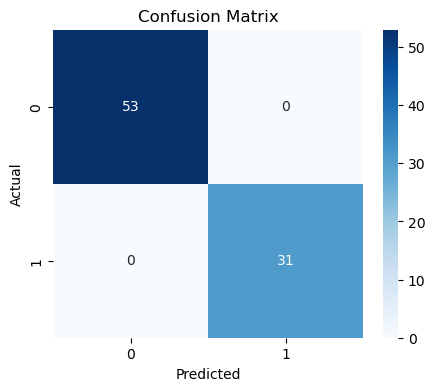

In [112]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


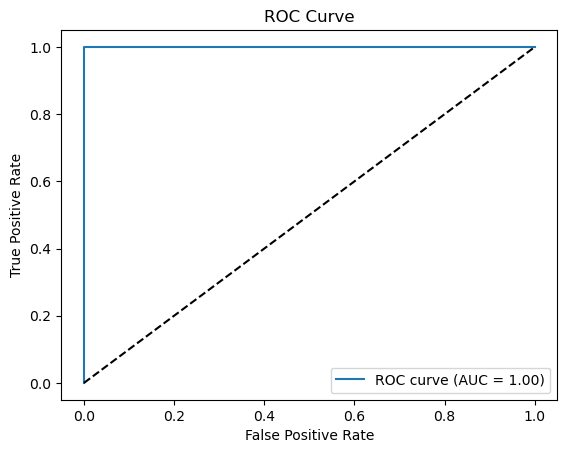

AUC Score: 1.0


In [114]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", roc_auc)
